# Mesa Granovetter example - Granovetter threshold model

## Description

Granovetter threshold model > Kempe generalize this model for the spread of ideas in social networks — linear
threshold (LT) and independent cascade (IC) > This agent-based model (ABM) is a probabilistic graph-based model inspired by the Independent Cascade (IC) model.

A "radical" will have a low threshold: the benefits of rioting are high to him, the cost of arrest, low. Some would be sufficiently radical to have a threshold of 0%/0-people who will riot even when no one else does. These are the "instigators." Conservatives will have high thresholds: the benefits of rioting are small or negative to them and the consequences of arrest high since they are likely to be "respectable citizens" rather than "known rabble-rousers." Thresholds of 80% or 90%0 may be common, and we may allow for those individuals who would not join under any circumstances by assigning them a threshold of 100%.

the aim of the formal model presented here is the same: to predict, from the initial distribution of thresholds, the ultimate number or proportion making each of the two decisions. Mathematically, the question is one of finding an equilibrium in a process occurring over time.

the variation of norms and preferences within the interacting group

        # A further requirement is that the decision be one where the costs and benefits to the actor of making one or the other choice depend in part on how many others make which choice. We may take riots as an example. The cost to an individual of joining a riot declines as riot size increases, since the probability of being apprehended is smaller the larger the number involved
        # A person's threshold for joining a riot is defined here as the proportion of the group he would have to see join before he would do so.
        

## Sample Model Description

The excercise model is a very simple simulated agent threshold model. The rules of our tutorial model:

1. There are some number of agents.
2. All agents begin as randomly placed on a grid.
3. At every step of the model, an agent considers his surrounding neighbors to be of the same type in order for them to be happy.
4. If an agent is unhappy, it moves the the unoccupied cell with maximal happines (if such happines is at least equal to the one at the current location); otherwise, an agent doesn't move

Despite its simplicity, this model yields results that are often unexpected to those not familiar with it.

## How to use and modify the code

These excercises are designed around a Mesa template that is given to you to reuse. You are not asked to perform any complex object programming, but instead we ask for understanding of the core features of the Mesa pyhton package. You will mostly have to modifly the existing template and code the ``Model`` and ``Agent``behavior using standard python code.

**Therefore, in this excercise, you are asked to fill your code where the comments state:**

``#[Your code here]``

Let’s get started.

# 1. Create the Basic Agent/Model

## Setting up the model

To begin writing the model code, we start with two core classes: one for
the overall model, the other for the agents. The model class holds the
model-level attributes, manages the agents, and generally handles the
global level of our model. Each instantiation of the model class will be
a specific model run. Each model will contain multiple agents, all of
which are instantiations of the agent class. Both the model and agent
classes are child classes of Mesa’s generic ``Model`` and ``Agent``
classes.

### At the location ``# 1 Initialization [Your code here]`` you have to implement:

Each agent has only one variable:
- engagement treshold

(Each agent will also have a unique identifier (i.e., a sequence position), stored in the ``unique_id`` variable. Giving each agent a unique id is a good practice when doing agent-based modeling.)

### At the location ``# 2 Step agent function [Your code here]`` you have to implement:

- if there are no neighbors - agent is happy and stays

### At the location ``# 3 Calculate the number of similar neighbours [Your code here]`` you have to implement:

- calculate the number of similar neighbours
- if the Agent is happy with it's neighbourhood - it stays

### At the location ``# 4 Move to an empty location if unhappy [Your code here]`` you have to implement:

- if the Agent is unhappy - perform move to better empty cell
- if at new location there are no neighbors - agent moves
- build a happines priority list of all possible empty cells
- move to a higest happines place from such list of empties, if happines is as high as at current location

The beginning of both classes looks like this:

In [1]:
from mesa import Model, Agent
from mesa.time import SimultaneousActivation
from mesa.space import SingleGrid

In [2]:
class GranovetterAgentBasic(Agent):
    
    def __init__(self, unique_id, engagement_treshold, model):
        '''
         Create a new Granovetter agent.

         Args:
            unique_id: Unique identifier for the agent.
            engagement_treshold: Treshold
        '''
        
        super().__init__(unique_id, model)
        
        # 1 Initialization [Your code here]
        
        self.engagement_treshold = engagement_treshold
        self.decision_reached = False
        self.engaged = False
    
    # agent step: 'rules' action when activated
    def step(self):
        '''
        Run one step of the agent. Move if unhappy, stay otherwise
        '''
        # 2 Step agent function [Your code here]
        if self.engaged == True:
            return
        
        # 3 the aggregation of individual preference of similar neighbours
        other_agents = self.model.schedule.agents
        engagement_rate = sum(agent.engaged == True for agent in other_agents) / len(other_agents)
        
        # 4 binary decisions-those where an actor has two distinct and mutually exclusive behavioral alternative
        if engagement_rate >= self.engagement_treshold:
            self.decision_reached = True
            
    # agent advance: 'simultaneous' behavior when activated
    def advance(self):
        
        # 5 Advance agent function [Your code here]
        if self.engaged == True:
            self.model.engaged += 1
            return
        # 6 Engage decided agents simultaneously [Your code here]
        elif self.decision_reached == True:
            self.model.engaged += 1
            self.engaged = True


## Adding the scheduler

Time in most agent-based models moves in steps, sometimes also called
**ticks**. At each step of the model, one or more of the agents –
usually all of them – are activated and take their own step, changing
internally and/or interacting with one another or the environment.

The **scheduler** is a special model component which controls the order
in which agents are activated. For example, all the agents may activate
in the same order every step; their order might be shuffled; we may try
to simulate all the agents acting at the same time; and more. Mesa
offers a few different built-in scheduler classes, with a common
interface. That makes it easy to change the activation regime a given
model uses, and see whether it changes the model behavior. This may not
seem important, but scheduling patterns can have an impact on your
results.

For now, let’s use one of the simplest ones: ``SimultaneousActivation``, which
activates all the agents once per step, in random order. Every agent is
expected to have a ``step`` method. The step method is the action the
agent takes when it is activated by the model schedule. We add an agent
to the schedule using the ``add`` method; when we call the schedule’s
``step`` method, the model shuffles the order of the agents, then
activates and executes each agent’s ``step`` method.

With that in mind, the model code with the scheduler added looks like
this:

### At the location ``# 1 Initialization [Your code here]`` you have to implement:

There are a number of model-level parameters: 

- height and width of the grid
- density of grid population to define how many agents and empty cells the model contains
- minority proportion to define proportion of two types of agents on the grid
- homophily treshold to which the agent is happy with its neighbourhood
- Use ``RandomActivation`` scheduler
- Use ``SingleGrid`` space with torus folding

### At the location ``# 2 Create agents [Your code here]`` you have to implement:

- use uniform random numbers to populate the grid based on density parameter
- use uniform random numbers to selects agent type based on minority proportion

When a new model is started, we want it to populate the grid itself with the defined number of agents segregated on the given proportion between two groups.

In [3]:
class GranovetterModelBasic(Model):

    def __init__(self, N, mu=0.25, sigma=0.122):
        '''
        Create a new Granovetter model.

         Args:
            N: how many agents the model contains
            mu: Vertical axis of the grid which is used together with Width to define the total number of agents in the system.
            sigma: Define the population density of agent in the system. Floating value from 0 to 1.
        '''
        
        super().__init__()
        
        # 1 Initialization [Your code here]
        
        self.num_agents = N
        self.schedule = SimultaneousActivation(self)
        
        self.engaged = 0
        
        self.running = True
        
        # 2 Create agents [Your code here]
        # Initial engagement rate in product basedon normal distr, clip negative to zero
        for i in range(self.num_agents):
            a = GranovetterAgentBasic(i, max(self.random.gauss(mu, sigma), 0.0), self)
            self.schedule.add(a)

    def step(self):
        '''
        Run one step of the model. If All agents are happy, halt the model.
        '''
        
        # 3 Step model function
        
        # Reset counter of happy agents each model step
        self.engaged = 0
        self.schedule.step()
        
        # 4 Stop the model if all agents are happy
        if self.engaged == self.schedule.get_agent_count():
            self.running = False

# 2. Run the Agent/Model Basic

### Running the model

At this point, we have a model which runs.
You can see for yourself with a few easy lines. If you’ve been working
in an interactive session, you can create a model object directly. 

With that last piece in hand, it’s time for the first rudimentary run of
the model.

Now let’s create a model with 10 x 10 agents, and run it for 10 steps.

### At the location ``# < Add model parameters [Your code here]`` you have to implement:

- specify all model-level parameters of its __init__ function
- height and width are given already as 10 x 10
- specify: density, minority proportion  and homophily treshold

In [4]:
model = GranovetterModelBasic(100, 0.25, 0.122)# < Add model parameters [Your code here] )

while model.running and model.schedule.steps < 100:
    model.step()
                            
print('The Schelling Model ran for {} steps'.format(model.schedule.steps))

The Schelling Model ran for 100 steps


# 3. Visualize the Agent/Model
# 4. Run the Agent/Model Visualization

Note that the ``GranovetterModelBasic`` has no spatial element, without agents moving around and interacting with nearby neighbors. Since there is no grid import from Mesa `from mesa.space import SingleGrid, MultiGrid`, we are not able to Visualize the model space.

# 5. Collect data to Analyze the Agent/Model

### Collecting Data

So far, at the end of every model run, we’ve had to go and write our own
code to get the data out of the model. This has two problems: it isn’t
very efficient, and it only gives us end results. If we wanted to know
the wealth of each agent at each step, we’d have to add that to the loop
of executing steps, and figure out some way to store the data.

Since one of the main goals of agent-based modeling is generating data
for analysis, Mesa provides a class which can handle data collection and
storage for us and make it easier to analyze.

The data collector stores three categories of data: model-level
variables, agent-level variables, and tables (which are a catch-all for
everything else). Model- and agent-level variables are added to the data
collector along with a function for collecting them. Model-level
collection functions take a model object as an input, while agent-level
collection functions take an agent object as an input. Both then return
a value computed from the model or each agent at their current state.
When the data collector’s ``collect`` method is called, with a model
object as its argument, it applies each model-level collection function
to the model, and stores the results in a dictionary, associating the
current value with the current step of the model. Similarly, the method
applies each agent-level collection function to each agent currently in
the schedule, associating the resulting value with the step of the
model, and the agent’s ``unique_id``.

Let’s add a DataCollector to the model, and collect two variables. At
the agent level, we want to collect every agent’s position at every step.
At the model level, let’s measure the model’s [Moran's I](https://en.wikipedia.org/wiki/Moran%27s_I), a
measure of spatial autocorrelation.

At the last step of the model, the datacollector will collect and store the
model-level Moran's I coefficient, as well as each agent’s position,
associating each with the last step.

### At the location ``# 4. Analysis code for calculating Moran's I [Your code here]`` you have to implement:


- calculate Moran's I for all agents and neighbours on the grid

### Agent code should be the same (refer in the code above)

### Model code has a ``DataCollector`` step

- note the use of ``DataCollector`` to collect the following model-level data:
- number of happy agents
- Moran's I

In [5]:
def get_engagement_ratio(model):
    '''
    Find the % of agents that are rioting.
    '''
    
    agent_engeged = [agent.engaged for agent in model.schedule.agents]
    N = model.num_agents
    
    engagement_rate = sum(agent_engeged) / N
    
    return engagement_rate

In [6]:
class GranovetterAgentAnalysis(Agent):
    
    def __init__(self, unique_id, engagement_treshold, model):
        '''
         Create a new Granovetter agent.

         Args:
            unique_id: Unique identifier for the agent.
            engagement_treshold: Treshold
        '''
        
        super().__init__(unique_id, model)
        
        # 1 Initialization [Your code here]
        
        self.engagement_treshold = engagement_treshold
        self.decision_reached = False
        self.engaged = False
    
    # agent step: 'rules' action when activated
    def step(self):
        '''
        Run one step of the agent. Move if unhappy, stay otherwise
        '''
        # 2 Step agent function [Your code here]
        if self.engaged == True:
            return
        
        # 3 the aggregation of individual preference of similar neighbours
        other_agents = self.model.schedule.agents
        engagement_rate = sum(agent.engaged == True for agent in other_agents) / len(other_agents)
        
        # 4 binary decisions-those where an actor has two distinct and mutually exclusive behavioral alternative
        if engagement_rate >= self.engagement_treshold:
            self.decision_reached = True
            
    # agent advance: 'simultaneous' behavior when activated
    def advance(self):
        
        # 5 Advance agent function [Your code here]
        if self.engaged == True:
            self.model.engaged += 1
            return
        # 6 Engage decided agents simultaneously [Your code here]
        elif self.decision_reached == True:
            self.model.engaged += 1
            self.engaged = True


In [7]:
from mesa.datacollection import DataCollector

class GranovetterModelAnalysis(Model):

    def __init__(self, N, mu, sigma):
        '''
        Create a new Granovetter model.

         Args:
            N: how many agents the model contains
            mu: Vertical axis of the grid which is used together with Width to define the total number of agents in the system.
            sigma: Define the population density of agent in the system. Floating value from 0 to 1.
        '''
        
        super().__init__()
        
        # 1 Initialization [Your code here]
        
        self.num_agents = N
        self.schedule = SimultaneousActivation(self)
        
        self.engaged = 0
        
        self.datacollector = DataCollector(    # < Note that we have both an agent and model data collector
            model_reporters={"engagement_ratio": get_engagement_ratio}, agent_reporters={"engaged": "engaged"}
        )
        
        self.running = True
        
        # 2 Create agents [Your code here]
        # Initial engagement rate in product basedon normal distr, clip negative to zero
        for i in range(self.num_agents):
            a = GranovetterAgentBasic(i, max(self.random.gauss(mu, sigma), 0.0), self)
            self.schedule.add(a)

    def step(self):
        '''
        Run one step of the model. If All agents are happy, halt the model.
        '''
        
        # 3 Step model function
        
        # Reset counter of happy agents each model step
        self.engaged = 0
        self.datacollector.collect(self)
        self.schedule.step()

        # 4 Stop the model if all agents are happy
        if self.engaged == self.schedule.get_agent_count():
            self.running = False

### Running the model

We run the model just as we did above. Now is when an interactive
session, especially via a Notebook, comes in handy: the DataCollector
can export the data it’s collected as a pandas DataFrame, for easy
interactive analysis.

Now we instantiate a model instance: a 10x10 grid, with an 98% chance of an agent being placed in each cell, approximately 50% of agents set as minorities, and agents wanting at least 3 similar neighbors.

We want to run the model until all the agents are happy with where they are. However, there's no guarentee that a given model instantiation will *ever* settle down. So let's run it for either 100 steps or until it stops on its own, whichever comes first:

### At the location ``# < Add model parameters [Your code here]`` you have to implement:

- specify all model-level parameters of its __init__ function
- height and width are given already as 10 x 10
- specify: density, minority proportion  and homophily treshold

In [8]:
model = GranovetterModelAnalysis(100, 0.25, 0.2)# < Add model parameters [Your code here] )

while model.running and model.schedule.steps < 100:
    model.step()
                            
print('The Schelling Model ran for {} steps'.format(model.schedule.steps))
model.datacollector.collect(model)

The Schelling Model ran for 5 steps


# 6. Run the Agent/Model Analysis

Now we can get the model-moran's I data.

You’ll see that the DataFrame’s index is pairings of model step and
agent ID. You can analyze it the way you would any other DataFrame.

### At the location ``# Create a plot for the number of happy agents over the model steps [Your code here]`` you have to implement:

- plot the number of happy agents data you collected


### At the location ``# Create a plot for the x, y position of a single agent over the model steps [Your code here]`` you have to implement:

- filter the data to select only one agent - using Pandas .xs method
- plot the x,y position of that agent data you collected

In [9]:
import pandas as pd

model_out = model.datacollector.get_model_vars_dataframe()
model_out.head()

,engagement_ratio
0,0.00
1,0.11
2,0.26
3,0.63
4,0.99


<AxesSubplot:>

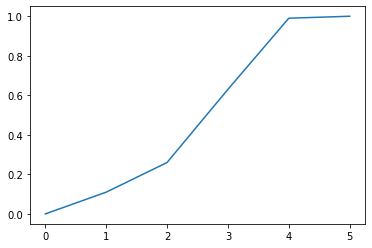

In [10]:
model_out.engagement_ratio.plot() # Create a plot for the number of happy agents over the model steps [Your code here]bm

Similarly, we can get the agent-position data:

In [11]:
agent_out = model.datacollector.get_agent_vars_dataframe()
agent_out.head()

engaged
Step AgentID         
0    0          False
     1          False
     2          False
     3          False
     4          False

<AxesSubplot:xlabel='Step'>

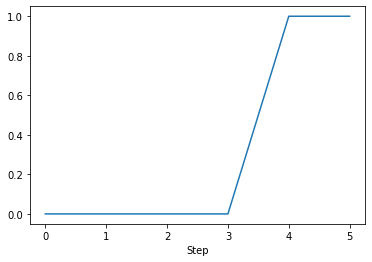

In [12]:
agent_out.xs(0, level="AgentID").engaged.astype(int).plot() # Create a plot for the x, y position of a single agent over the model steps [Your code here]

# 7. Create iteration Batch of the Agent/Model

### Batch Run

Like we mentioned above, you usually won’t run a model only once, but
multiple times, with fixed parameters to find the overall distributions
the model generates, and with varying parameters to analyze how they
drive the model’s outputs and behaviors. Instead of needing to write
nested for-loops for each model, Mesa provides a ``batch_run`` function
which automates it for you.

The batch runner also requires an additional variable ``self.running``
for the Model class. This variable enables conditional shut off of
the model once a condition is met.

### At the location ``# < Add model parameters [Your code here]`` you have to implement:

- specify all model-level parameters of its __init__ function
- height and width are given already as 10 x 10
- specify: density, minority proportion  and homophily treshold

In [13]:
import numpy as np

params = {"N": 100, "mu": 0.25, "sigma": np.linspace(0,1,11)} # < Add model parameters [Your code here] } 

# 8. Run the Agent/Model Batch

### Running the model

We call ``batch_run`` with the following arguments:

* ``model_cls``

  The model class that is used for the batch run.

* ``parameters``

  A dictionary containing all the parameters of the model class and
  desired values to use for the batch run as key-value pairs. Each
  value can either be fixed ( e.g. ``{"height": 10, "width": 10}``)
  or an iterable (e.g. ``{"homophily": range(0,100, 13)}``). ``batch_run``
  will then generate all possible parameter combinations based on this
  dictionary and run the model ``iterations`` times for each combination.

* ``number_processes``

  Number of processors used to run the sweep in parallel. Optional.
  If not specified, defaults to use all the available processors.

  Note: Multiprocessing does make debugging challenging. If your
  parameter sweeps are resulting in unexpected errors set ``number_processes = 1``.
  
  Also, if your batcher is stuck and is not running for some reason, try also setting ``number_processes = 1``, since this issue might also be related to multiprocessing issues.

* ``iterations``

  The number of iterations to run each parameter combination for. Optional.
  If not specified, defaults to 1.

* ``data_collection_period``

  The length of the period (number of steps) after which the model and
  agent reporters collect data. Optional. If not specified, defaults to -1,
  i.e. only at the end of each episode.

* ``max_steps``

  The maximum number of time steps after which the model halts. An episode
  does either end when ``self.running`` of the model class is set to
  ``False`` or when ``model.schedule.steps == max_steps`` is reached.
  Optional. If not specified, defaults to 1000.

* ``display_progress``

  Display the batch run progress. Optional. If not specified, defaults to ``True``.

In the following example, we hold the height and width fixed, and vary
the homophily treshold of agents. We tell the batch runner to run 10 instantiations
of the model with each number of agents, and to run each for 200 steps.

We want to keep track of

1. the Moran's I coefficient value and
2. the individual agent’s position development.

In [14]:
# If your batcher is stuck and is not running for some reason, try setting number_processes = 1

from mesa.batchrunner import batch_run

results = batch_run(
    GranovetterModelAnalysis,
    parameters=params,
    iterations=10,
    max_steps=100,
    number_processes=None,
    data_collection_period=-1,
    display_progress=True,
)

110it [00:01, 72.41it/s]


# 9. Run the Batch data Analysis

### Data visualization

First, we want to take a closer look at how the Moran's I coefficient at the
end of each episode changes as we increase the homophily treshold of the population.
For this, we group our data on the ``RunId`` identifier and get a single value per ``RunId`` using a median. Our results to only contain the data of Moran's I for the entire population at the final step of each episode and then box-plot the values
for the Moran's I coefficient over the the hoophily of agents. Notice there are
10 values for each homophily treshold since we set ``iterations=10`` when
calling the batch run.

In [15]:
import pandas as pd

results_df = pd.DataFrame(results)
results_df.head()

,RunId,iteration,Step,N,mu,sigma,engagement_ratio,AgentID,engaged
0,0,0,4,100,0.25,0.2,0.93,0,True
1,0,0,4,100,0.25,0.2,0.93,1,True
2,0,0,4,100,0.25,0.2,0.93,2,True
3,0,0,4,100,0.25,0.2,0.93,3,True
4,0,0,4,100,0.25,0.2,0.93,4,True


Task: Find out how variance (std) influences the final number of separation using the mean or box plot. You should be able to plot the average outcome for each homophily value.

**hint** Your plot should look similar to [this paper](https://www.jasss.org/15/1/6.html). Not neccesarily with Moran's I, but the transition should be visible

### At the location ``# Create a box-plot for the Moran's I over the homophily tresholds [Your code here]`` you have to implement:

- plot the boxplot of Moran's I values over homophiliy treshold values from models data you collected
- using the Pandas ``.boxplot()`` method
- group Moran's I values by ``homophily``
- plot the ``Morans_I`` column

In [16]:
# Create a box-plot for the Moran's I over the homophily tresholds [Your code here]
results_df.groupby(by=["RunId", "iteration", "Step"]).median()

,,,N,mu,sigma,engagement_ratio,AgentID,engaged
RunId,iteration,Step,,,,,,
0,0,4,100.0,0.25,0.2,0.93,49.5,1.0
1,0,100,100.0,0.25,0.3,0.98,49.5,1.0
2,0,100,100.0,0.25,0.4,0.96,49.5,1.0
3,0,100,100.0,0.25,0.5,0.88,49.5,1.0
4,0,100,100.0,0.25,0.6,0.81,49.5,1.0
...,...,...,...,...,...,...,...,...
105,9,100,100.0,0.25,0.7,0.84,49.5,1.0
106,9,100,100.0,0.25,0.9,0.63,49.5,1.0
107,9,100,100.0,0.25,1.0,0.76,49.5,1.0


<AxesSubplot:title={'center':'engagement_ratio'}, xlabel='sigma'>

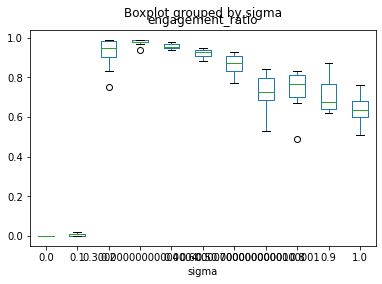

In [17]:
results_df.groupby(by=["RunId"]).median().boxplot(by ='sigma', column =['engagement_ratio'], grid=False)